In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('M03_01_La_Paz.csv')
df.head()

,cve_ent,cve_mun,cve_sun,cvegeo,sun,gmu,iisu_sun,iisu_cd,Pob_2010,Empleo,E_basica,E_media,E_superior,Salud_cama,Salud_cons,Abasto,Espacio_ab,Cultura,Est_Tpte,geometry
0,3,3,M03.01,0300300012036024,La Paz,medio,Intermedio,Alto,41,981.0,2.0,1.0,0.0,0.0,6.0,79.0,0.0,1.0,0.0,POLYGON ((-110.29193445471651 24.1651066768318...
1,3,3,M03.01,0300300012036029,La Paz,medio,Intermedio,Alto,45,1162.0,2.0,1.0,0.0,0.0,6.0,81.0,0.0,1.0,0.0,POLYGON ((-110.29315743503024 24.1645491202004...
2,3,3,M03.01,0300300012036023,La Paz,medio,Intermedio,Alto,62,1162.0,2.0,1.0,0.0,0.0,6.0,81.0,0.0,1.0,0.0,POLYGON ((-110.29268112774388 24.1642191451015...
3,3,3,M03.01,0300300012036014,La Paz,medio,Intermedio,Alto,59,356.0,2.0,0.0,0.0,0.0,6.0,51.0,0.0,0.0,0.0,POLYGON ((-110.28794424946271 24.1636203955556...
4,3,3,M03.01,0300300013496001,La Paz,alto,Bajo,Intermedio,97,199.0,0.0,0.0,0.0,0.0,6.0,43.0,0.0,0.0,0.0,POLYGON ((-110.28443242577706 24.1636170926166...


In [3]:
geometry = df['geometry']
# Extrae solo sol datos, las celdas tienen este formato: POLYGON ((-110.29193445471651 24.165106676831876, -110.29152810819907 24.164824612524466, -110.29221399848137 24.164009333700207, -110.29262097708845 24.164290643689796, -110.29193445471651 24.165106676831876))
geometry = geometry.str.extract(r'POLYGON \(\(([^)]+)\)\)')
geometry

,0
0,"-110.29193445471651 24.165106676831876, -110.2..."
1,"-110.29315743503024 24.16454912020044, -110.29..."
2,"-110.29268112774388 24.164219145101516, -110.2..."
3,"-110.28794424946271 24.163620395555625, -110.2..."
4,"-110.28443242577706 24.163617092616622, -110.2..."
...,...
4864,"-110.40850013363752 24.097329505300287, -110.4..."
4865,"-110.40913700036265 24.09805852413014, -110.40..."
4866,"-110.40788877490895 24.096629675187263, -110.4..."
4867,"-110.40863319246571 24.09607457133082, -110.40..."


In [4]:
lista = set()
for coords in geometry[0]:
    puntos = coords.split(', ')
    for punto in puntos:
        lon, lat = map(float, punto.split())
        lista.add((lon, lat))

In [5]:
import matplotlib.pyplot as plt

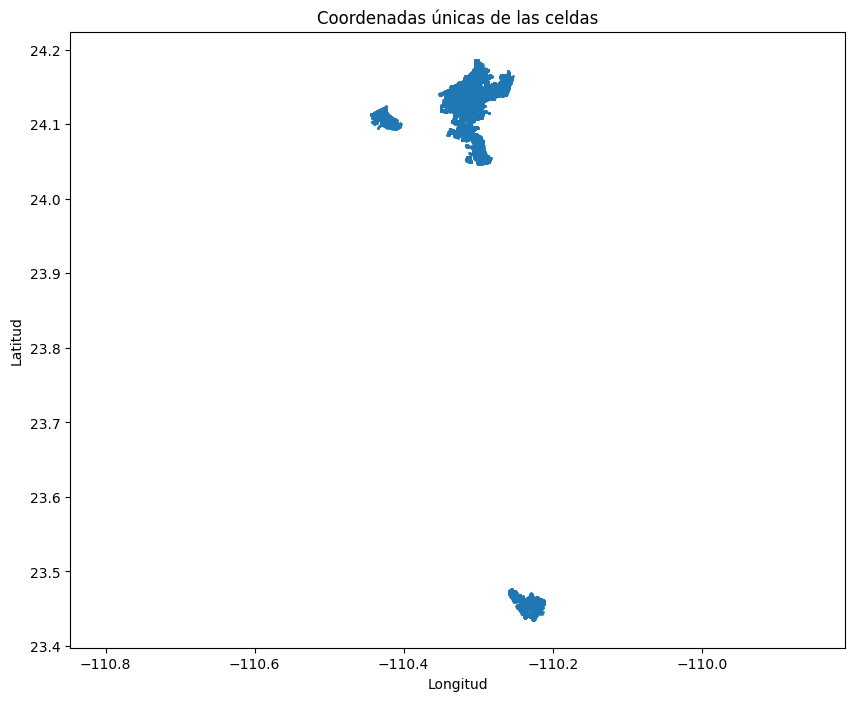

In [6]:
# graficar los puntos
lons, lats = zip(*lista)
plt.figure(figsize=(10, 8))
plt.scatter(lons, lats, s=1)
plt.title('Coordenadas únicas de las celdas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('equal')
plt.show()


In [7]:
coordenadas_filtradas = pd.DataFrame(lista, columns=['Longitude', 'Latitude'])
coordenadas_filtradas = coordenadas_filtradas[coordenadas_filtradas['Latitude'] >= 24]
coordenadas_filtradas = coordenadas_filtradas[coordenadas_filtradas['Longitude'] <= -110.4]


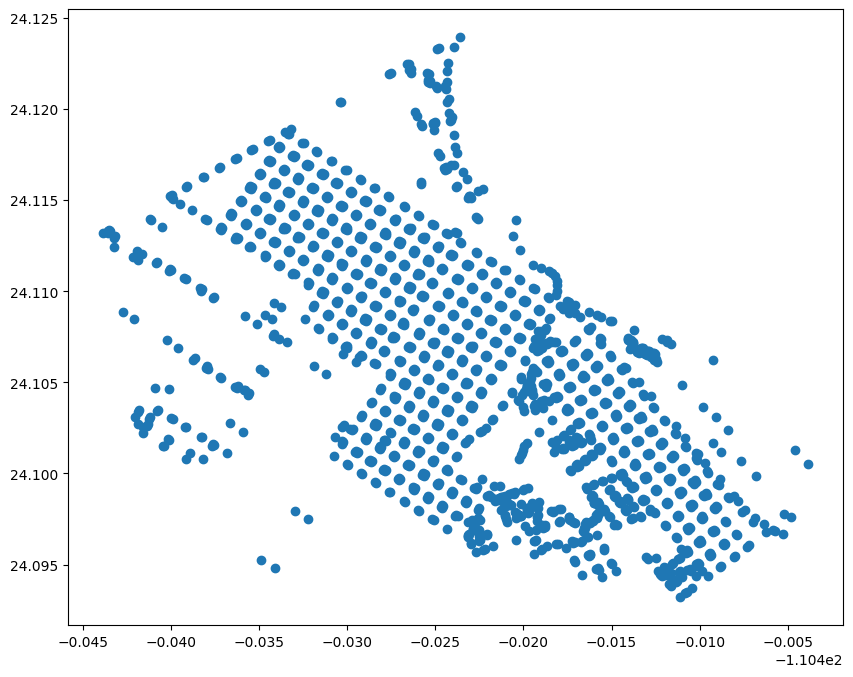

In [8]:
# graficar las coordenadas filtradas
plt.figure(figsize=(10, 8))
plt.scatter(coordenadas_filtradas['Longitude'], coordenadas_filtradas['Latitude'])

In [9]:
tamaño_muestra = int(len(coordenadas_filtradas) * 0.2)
tamaño_muestra

352

In [ ]:
muestra = coordenadas_filtradas.sample(n=tamaño_muestra, random_state=1)
muestra

,Longitude,Latitude
11051,-110.419505,24.104463
9794,-110.426754,24.104994
24359,-110.432203,24.110358
14360,-110.417756,24.109029
17928,-110.413001,24.099776
...,...,...
18272,-110.419500,24.098321
31577,-110.426152,24.119806
308,-110.425993,24.107664
3299,-110.416775,24.103969
